### Exercici 1
#### Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [442]:
columnes= ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
housing= pd.read_csv("/Users/esthersanroma/Desktop/DATA SCIENCES/housing data.csv", sep=',', names = columnes,encoding="latin-1",header=None)
house= pd.DataFrame(housing)

In [540]:
print(house)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [443]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Anàlisis del dataset

1. CRIM:Taxa de delinqüència per càpita per municipis.
2. ZN:Proporció ZN de sòl residencial zonificat per a solars superiors
   25.000 peus quadrats.
3. INDUS:Proporció INDUS d'hectàrees comercials no minoristes per ciutat.
4. CHAS:Variable ficticia de CHAS Charles River (= 1 si els límits del 
   tracte riu; 0 en cas contrari)
5. NOX:Concentració d'òxids nítrics de NOX (parts per 10 milions)
6. RM:nombre mitjà d'habitacions per habitatge
7. AGE:Proporció d'EDAT de les unitats ocupades pel propietari construïdes
   abans de 1940
8. DIS:Distàncies ponderades DIS fins a cinc centres d'ocupació de Boston       
9. RAD:Índex RAD d'accessibilitat a les carreteres radials
10.TAX:Impost de valor total de l'impost sobre la propietat per 10.000 $
11.PTRATIO:Ràtio alumnes-professor per municipis
12.B:1000(Bk - 0,63)^2 on Bk és la proporció de negres per poble
13.LSTAT:% d'estatus inferior de la població
14.MEDV:Valor mitjà de les cases ocupades pel propietari en 1.000 dòlars

In [541]:
house.shape

(506, 14)

In [444]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [547]:
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [542]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


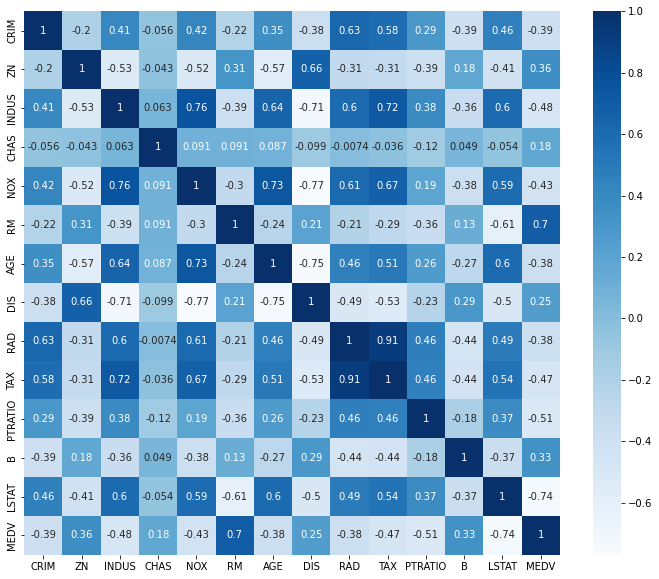

In [543]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(house.corr(),cmap="Blues", annot=True);

Fem un gràfic "LSTAT",“MEDV” i tambè "MEDV", "RM". Son dos variables que tenen molta correlació amb MEDV

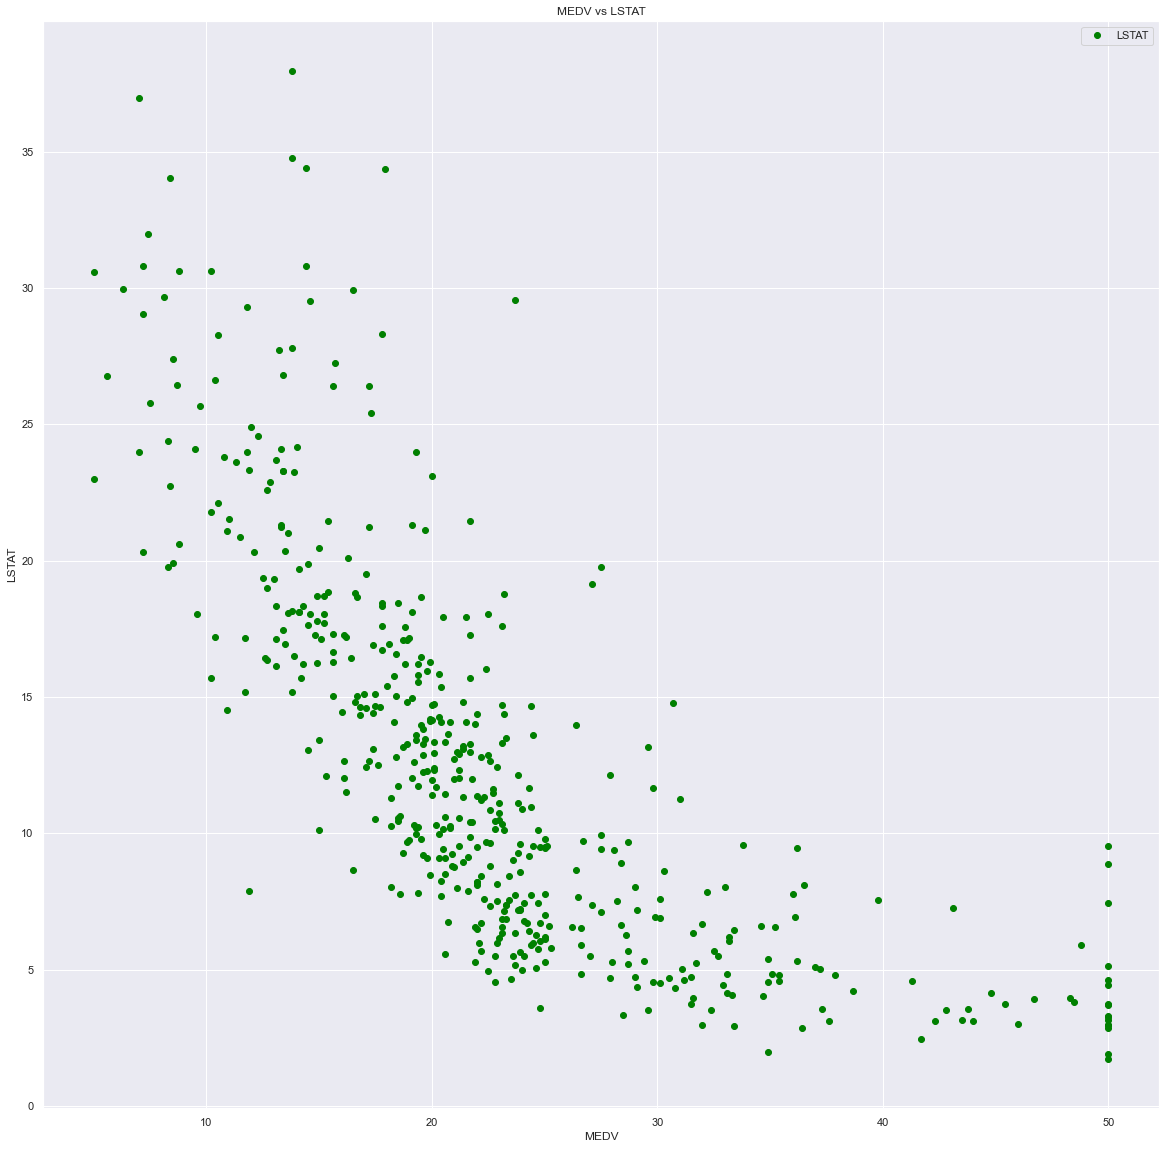

In [549]:
house.plot(x='MEDV', y='LSTAT', style='o', color= "green") 
plt.title('MEDV vs LSTAT') 
plt.xlabel('MEDV') 
plt.ylabel('LSTAT') 
plt.show()

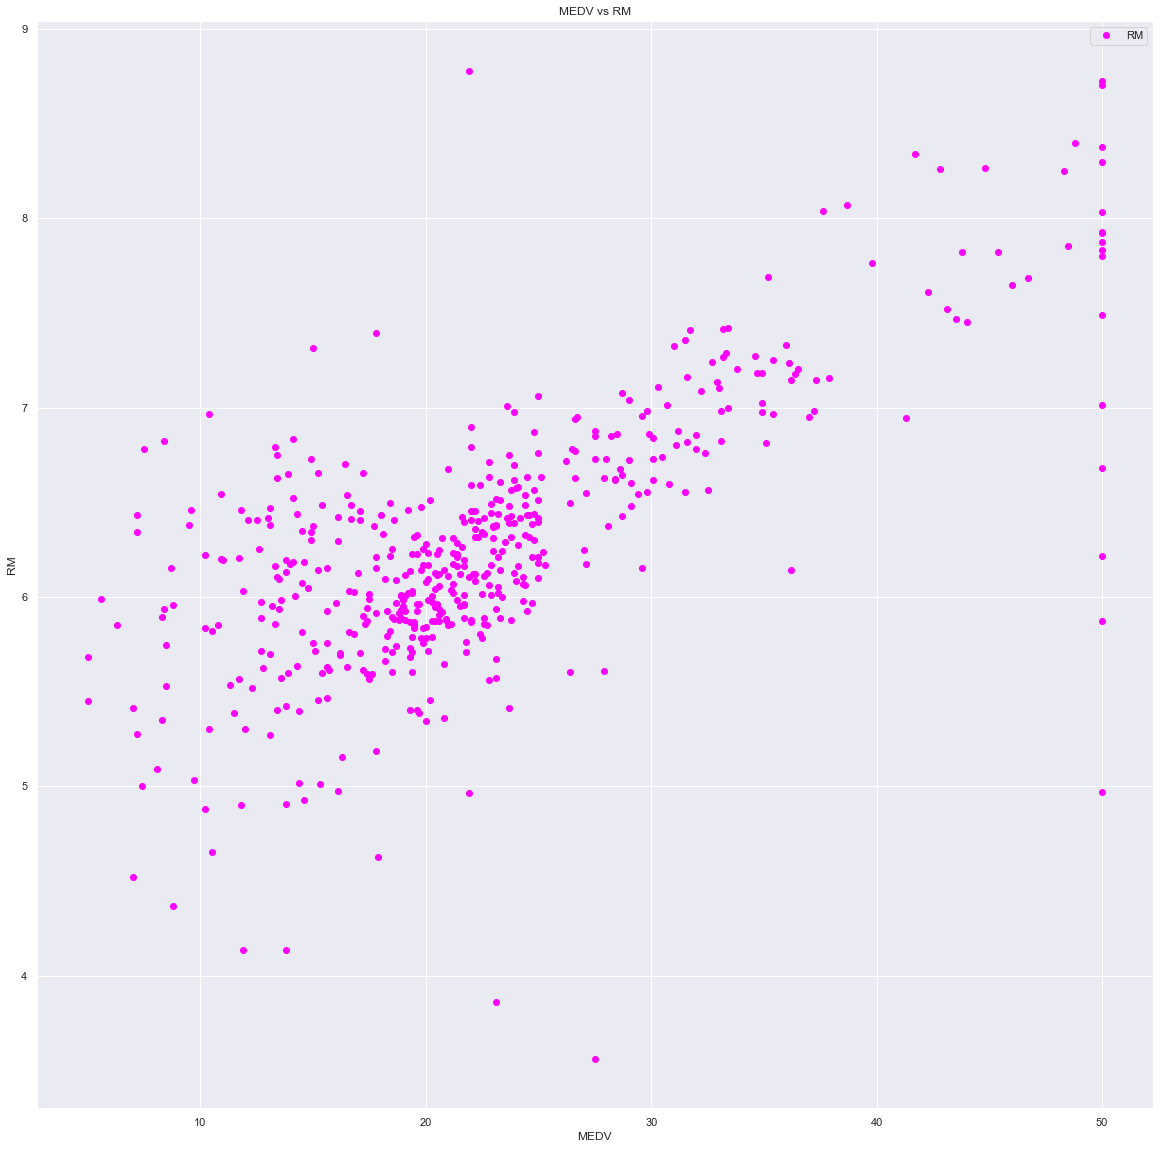

In [548]:
house.plot(x='MEDV', y='RM', style='o', color= "magenta") 
plt.title('MEDV vs RM') 
plt.xlabel('MEDV') 
plt.ylabel('RM') 
plt.show()

Fem una gràfica boxplot per saber si hi han outliers.

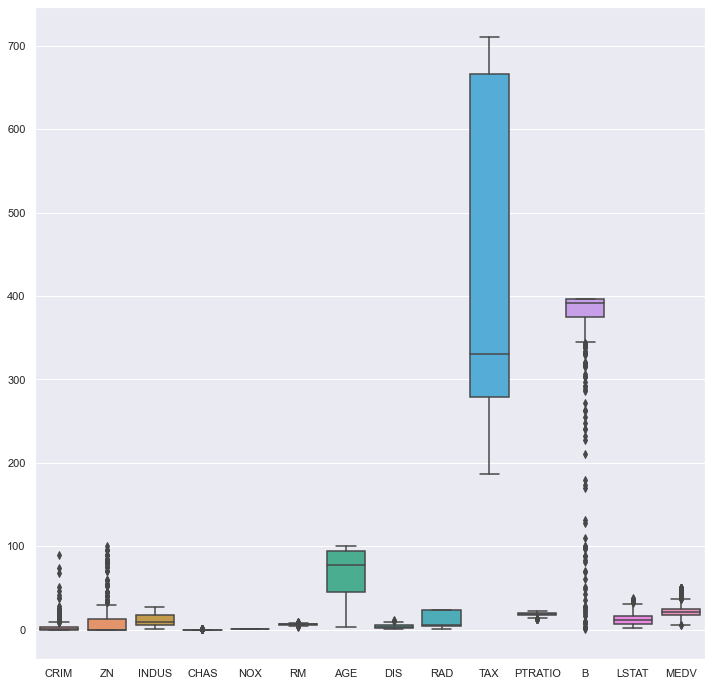

In [546]:
sns.boxplot(data=house)
sns.set(rc = {'figure.figsize':(20,20)})

In [445]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [446]:
columnes = house.columns.drop("MEDV")
scaler_robust = RobustScaler()
scaler_minmax = MinMaxScaler()

X = house[columnes]
X_scaled_robust = scaler_robust.fit_transform(X)
X_scaled_minmax = scaler_minmax.fit_transform(X_scaled_robust)

Hem normalitzat les dades utilitzant la tècnica "RobustScaler", despres ho hem fet minmax scaler .  Hem fet un robust scaler per tractar els outliers i un min-max scaler per ajustar les dades dins d'un rang específic.
Això ens permet que les dades estiguin escalades i estiguin dins d'un rang específic, i així evitar que cap variable tingui un pes més gran en la predicció.
Ja podem procedir a entrenar els models de regressió amb les dades normalitzades, podem fer la divisió de dades de train i test , utilitzant X_scaled_minmax com a conjunt de dades processades. 

In [447]:
from sklearn.model_selection import train_test_split

In [448]:
y = house["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled_minmax, y, test_size=0.2, random_state=42)

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler_minmax.fit_transform(scaler_robust.fit_transform(X_train))
X_test = scaler_minmax.transform(scaler_robust.transform(X_test))

In [450]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


El train-test split es fa per fer el primer pas per separar les dades en dos conjunts, un per entrenar el model i un altre per testar-lo. 

Després de fer la divisió, es pot aplicar diferents models de regressió per intentar predir el millor possible el preu de les vivendes (MEDV). Aquesta aplicació es pot fer utilitzant les dades d'entrenament per entrenar els diferents models i després utilitzar les dades de test per avaluar les seves prestacions.

In [498]:
print(np.shape(X_train))
print(np.shape(y_train))

(404, 13)
(404,)


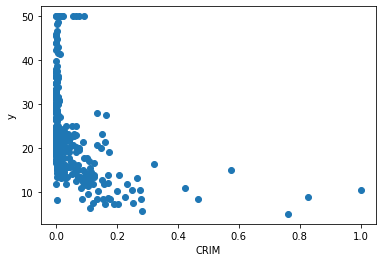

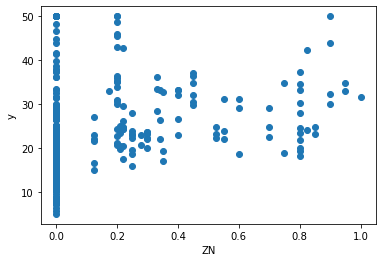

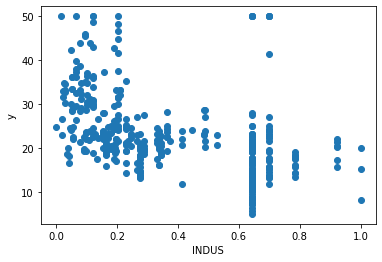

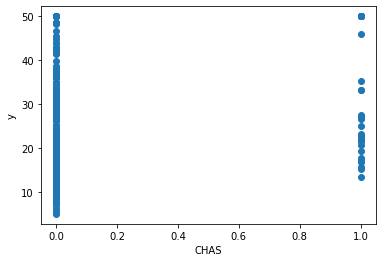

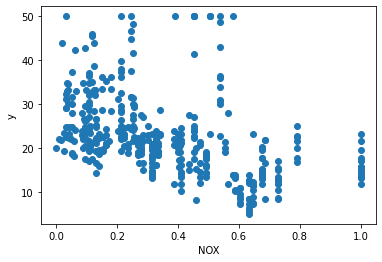

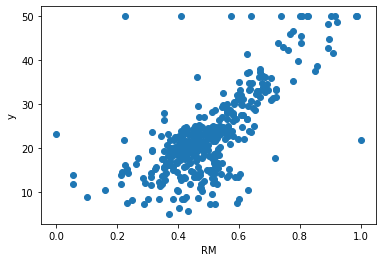

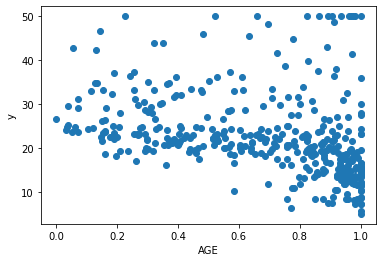

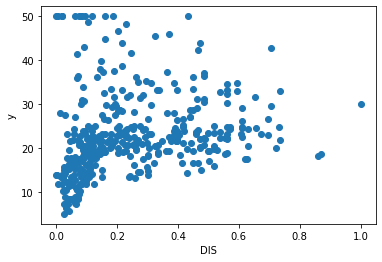

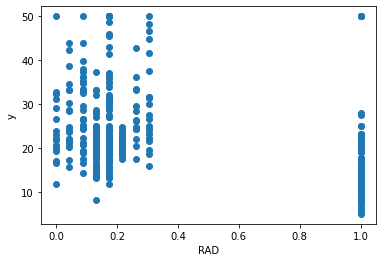

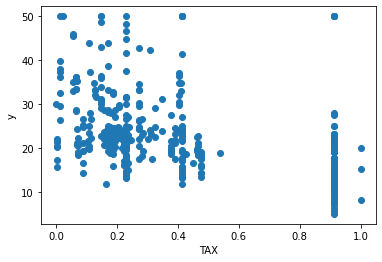

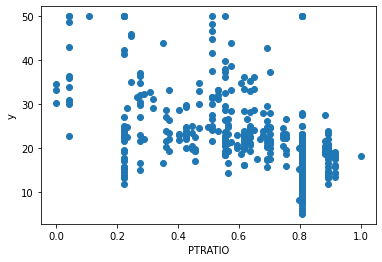

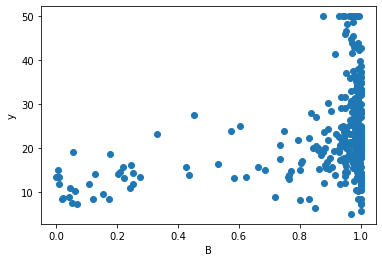

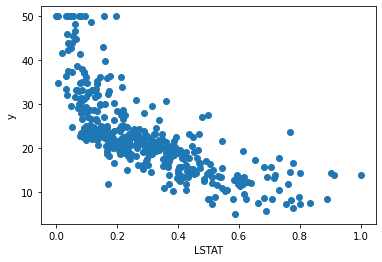

In [453]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:,i], y_train)
    plt.xlabel(col_names[i])
    plt.ylabel('y')
    plt.show()

LINEAR REGRESSION

In [454]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_LR= model_LR.predict(X_test)

In [455]:
y_test = np.array(y_test)
y_pred_LR = np.array(y_pred_LR)
house01= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_LR.flatten()})
house01

,Actual,Predicted
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880
...,...,...
97,17.9,-0.164237
98,9.6,13.684867
99,17.2,16.183597
100,22.5,22.276220


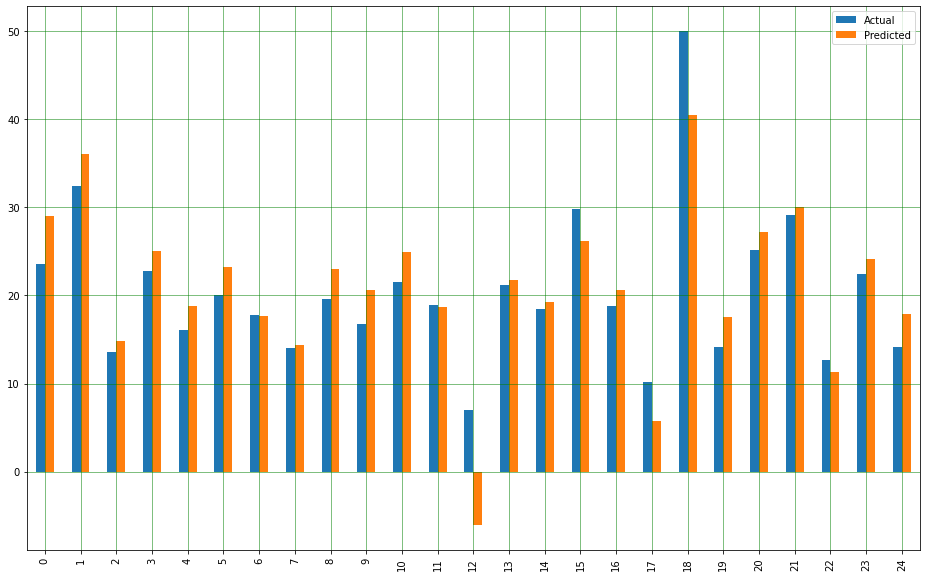

In [456]:
house03=house01.head(25)
house03.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [457]:
coeff_house = pd.DataFrame(model_LR.coef_, X.columns, columns=['Coefficient']) 
coeff_house

,Coefficient
CRIM,-10.058262
ZN,3.011046
INDUS,1.090279
CHAS,2.784438
NOX,-8.360480
RM,21.825753
AGE,-0.611377
DIS,-15.922031
RAD,6.035884
TAX,-5.578916


El valor absolut del coeficient indica la força de la relació.
El coeficient per a RM és positivament 21.825753, el que indica que hi ha una relació positiva entre RM i MEDV. Això significa que a mesura que augmenta el valor de RM, el valor de MEDV també augmenta. El coeficient és altament rellevant, el que indica que RM és una característica important per al model.
El resultat de LSTAT -18.430628 significa que l'augment d'1 unitat en la variable LSTAT (percentatge de propietaris amb baix ingrés) es relaciona amb una disminució de 18.430628 en el preu de la casa (MEDV).

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

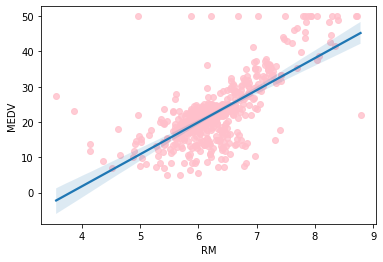

In [459]:
sns.regplot(x='RM', y='MEDV', data=house, scatter_kws={'color': 'pink'})

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

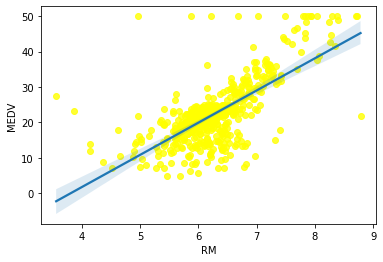

In [460]:
sns.regplot(x='RM', y='MEDV', data=house, scatter_kws={'color': 'yellow'})

Podem utilitzar diferents mètriques per avaluar el rendiment del model, com el MSE (Mean Squared Error) o el R2 (coeficient de determinació)

In [461]:
from sklearn.metrics import mean_squared_error, r2_score
mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)
print("MSE_LR:", mse_LR)
print("R2_LR:", r2_LR)

MSE_LR: 24.291119474973527
R2_LR: 0.6687594935356318


Aquests resultats indiquen que el model de regressió lineal té una precisió moderada. El MSE mesura la diferència entre les dades observades i les dades predites, i un valor més baix indica una millor precisió. El R2 mesura la proporció de variació de les dades observades que es pot explicar per les dades predites, i un valor més proper a 1 indica una millor precisió. En aquest cas, el MSE és relativament alt i el R2 és moderat, però pot ser millorat en utilitzar altres tècniques

TREE REGRESSOR

In [490]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [463]:
tree_model = DecisionTreeRegressor(max_depth=3, min_samples_split=5, min_samples_leaf=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

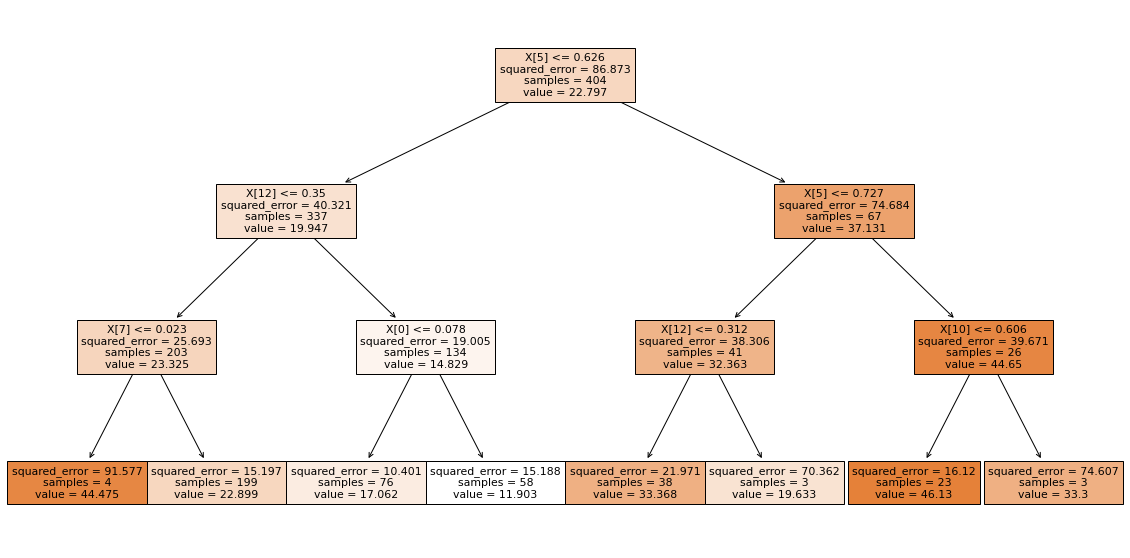

In [464]:
plt.figure(figsize=(20,10))
plt = plot_tree(tree_model, filled=True)
plot=feature_names = list(house.drop(columns = "MEDV").columns)

In [465]:
print(f"Profundidad de l'arbre: {tree_model.get_depth()}")
print(f"Número de nodes terminals: {tree_model.get_n_leaves()}")

Profundidad de l'arbre: 3
Número de nodes terminals: 8


In [466]:
from sklearn.tree import export_text

In [467]:
text_model = export_text(
                    decision_tree = tree_model,
                    feature_names = list(house.drop(columns = "MEDV").columns)
               )
print(text_model)

|--- RM <= 0.63
|   |--- LSTAT <= 0.35
|   |   |--- DIS <= 0.02
|   |   |   |--- value: [44.48]
|   |   |--- DIS >  0.02
|   |   |   |--- value: [22.90]
|   |--- LSTAT >  0.35
|   |   |--- CRIM <= 0.08
|   |   |   |--- value: [17.06]
|   |   |--- CRIM >  0.08
|   |   |   |--- value: [11.90]
|--- RM >  0.63
|   |--- RM <= 0.73
|   |   |--- LSTAT <= 0.31
|   |   |   |--- value: [33.37]
|   |   |--- LSTAT >  0.31
|   |   |   |--- value: [19.63]
|   |--- RM >  0.73
|   |   |--- PTRATIO <= 0.61
|   |   |   |--- value: [46.13]
|   |   |--- PTRATIO >  0.61
|   |   |   |--- value: [33.30]



 model_tree prediu un valor de mitjana 44,48  per habitatges que estan una zona amb : RM <= 0,63, un LSTAT <= 0.35 y un DIS <= 0.02

In [468]:
importancia_predictors = pd.DataFrame(
                            {'predictor': house.drop(columns = "MEDV").columns,
                             'importancia': tree_model.feature_importances_}
                            )
print("Importancia dels predictors")
importancia_predictors.sort_values('importancia', ascending=False)

Importancia dels predictors


,predictor,importancia
5,RM,0.665857
12,LSTAT,0.223646
7,DIS,0.064284
0,CRIM,0.030827
10,PTRATIO,0.015386
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000


RM és el predictor  més important seguit de LSTAT

In [469]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("MSE_tree:", mse_tree)
print("R2_tree:",r2_tree )

MSE_tree: 13.59476157737598
R2_tree: 0.8146180247150895


### Exercici 2
#### Compara’ls en base al MSE i al R2.

In [470]:
print("MSE_LR:", mse_LR)
print("R2_LR:", r2_LR)
print("MSE_tree:", mse_tree)
print("R2_tree:",r2_tree )

MSE_LR: 24.291119474973527
R2_LR: 0.6687594935356318
MSE_tree: 13.59476157737598
R2_tree: 0.8146180247150895


In [471]:
R2_MSE = pd.DataFrame( data = [['Linear Regression', r2_LR, mse_LR],
                                  ['Decision Tree Regressor', r2_tree, mse_tree]],
                                  columns = ['Model', 'R2', 'MSE'])
R2_MSE.head()

,Model,R2,MSE
0,Linear Regression,0.668759,24.291119
1,Decision Tree Regressor,0.814618,13.594762


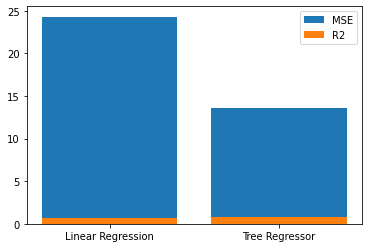

In [472]:
import matplotlib.pyplot as plt
x = ['Linear Regression', 'Tree Regressor']
y1 = [mse_LR, mse_tree]
y2 = [r2_LR, r2_tree]

fig, ax = plt.subplots()
ax.bar(x, y1, label='MSE')
ax.bar(x, y2, label='R2')
ax.legend()
plt.show()

La puntuació R2 oscil·la entre -1 i 1, on 1 és un ajust perfecte i -1 és un ajust dolent. El MSE és la mitjana de les diferències al quadrat entre els valors objectiu previstos i reals. Els valors de MSE més baixos indiquen un millor ajust. Decision Tree Regressor ens donar millor resultats.

### Exercici 3
#### Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

 GridSearchCV per automatitzar el procés de cerca de valors òptims del paràmetre i, un cop entrenat el model, es crea una figura amb un subplot on es representen les dades obtingudes en forma de gràfic de línies. A través d'aquest gràfic es pot veure com el punt amb millor puntuació en les dades de validació cruzada (puntuació mitjana de test) està associat a un valor específic del paràmetre ccp_alpha.

In [473]:
from sklearn.model_selection import GridSearchCV

In [474]:
parameters = {'ccp_alpha':[0.0, 0.001, 0.01, 0.1, 1]}

regressor = DecisionTreeRegressor()
grid = GridSearchCV(estimator=regressor, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_model

DecisionTreeRegressor(ccp_alpha=1)

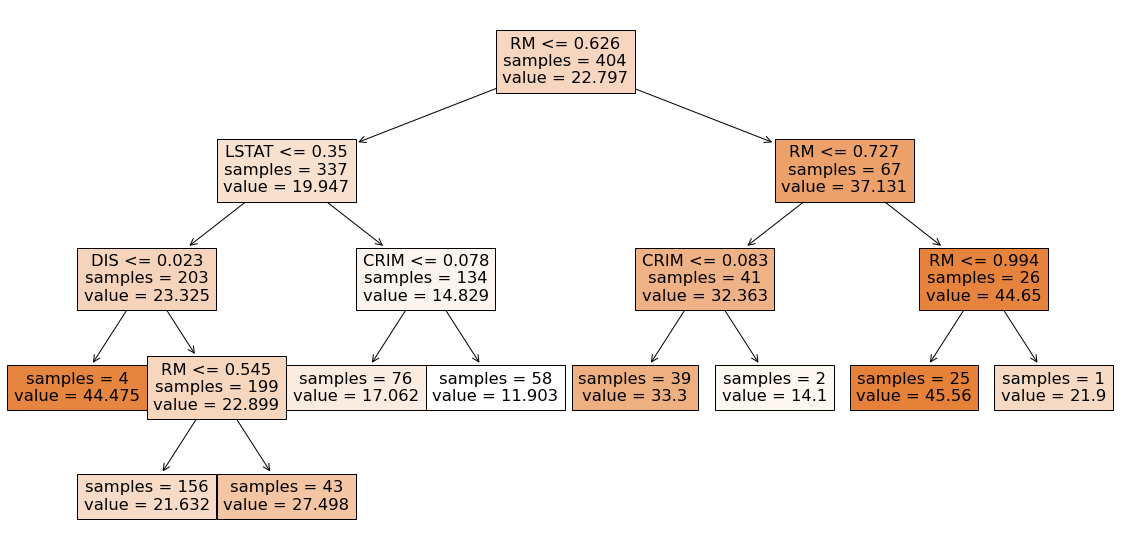

In [497]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = plot_tree(
            decision_tree = best_model,
            feature_names = columnes,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [495]:
grid.best_params_

{'ccp_alpha': 1}

### Exercici 4
#### Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [483]:
mse_before = mean_squared_error(y_test, y_pred_tree)
r2_before = r2_score(y_test, y_pred_tree)

In [486]:
scores = cross_val_score(regressor, X_train, y_train, cv=5)
mse_after = np.mean(scores)
r2_after = np.mean(scores) 

In [488]:
print("MSE abans de la validació: ", mse_before)
print("MSE després de la validació: ", mse_after)
print("R2 abans de la validació: ", r2_before)
print("R2 després de la validació: ", r2_after)

MSE abans de la validació:  13.59476157737598
MSE després de la validació:  0.6479817200594891
R2 abans de la validació:  0.8146180247150895
R2 després de la validació:  0.6479817200594891


A partir d'aquests resultats, es pot veure que hi ha una millora significativa en les mètriques d'avaluació del model després de fer la validació. El MSE (error quadràtic mitjà) s'ha reduït significativament, passant de 13.59 a 0.65, i el punt de tall R2 ha augmentat de 0.81 a 0.65. Això indica que el model s'està ajustant millor als dades després de fer la validació. 

### Exercici 5
#### No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [518]:
columnes1 = house.columns.drop(["MEDV", "RM"])
scaler_robust1 = RobustScaler()
scaler_minmax1 = MinMaxScaler()

X1= house[columnes1]
X_scaled_robust1 = scaler_robust1.fit_transform(X1)
X_scaled_minmax1 = scaler_minmax1.fit_transform(X_scaled_robust1)

y1 = house["MEDV"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled_minmax1, y1, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train1 = scaler_minmax1.fit_transform(scaler_robust1.fit_transform(X_train1))
X_test1 = scaler_minmax1.transform(scaler_robust1.transform(X_test1))

In [519]:
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(404, 12) (102, 12) (404,) (102,)


Utilitzarem Random Forest Regressor

In [520]:
from sklearn.ensemble import RandomForestRegressor

In [521]:
RF= RandomForestRegressor(n_estimators = 300, max_depth = 8)
RF.fit(X_train1, y_train1)
y_pred_rf = RF.predict(X_test1)
y_pred_rf[:10]

array([24.25559715, 36.31077565, 16.54802039, 24.97977332, 16.39408241,
       20.81545841, 19.16600787, 15.42090256, 20.91046597, 20.88807229])

In [522]:
importance = RF.feature_importances_
importance

array([0.04109751, 0.00815712, 0.01416383, 0.00188065, 0.02636278,
       0.02330084, 0.0579595 , 0.0042873 , 0.02991137, 0.04986112,
       0.02329329, 0.71972468])

In [523]:
r2_RF= r2_score(y_test1, y_pred_rf )
print("R2 RF:", r2_RF)
mse_RF = mean_squared_error(y_test1, y_pred_rf )
print("MSE RF:", mse_RF)

R2 RF: 0.8132654631221532
MSE RF: 13.69395003594335


In [532]:
feature_names = house.columns.drop(["MEDV", "RM"])

for f in range(X_train1.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

1. feature LSTAT (0.719725)
2. feature DIS (0.057960)
3. feature PTRATIO (0.049861)
4. feature CRIM (0.041098)
5. feature TAX (0.029911)
6. feature NOX (0.026363)
7. feature AGE (0.023301)
8. feature B (0.023293)
9. feature INDUS (0.014164)
10. feature ZN (0.008157)
11. feature RAD (0.004287)
12. feature CHAS (0.001881)


In [ ]:
La que obte més importancia és LSTAT. 

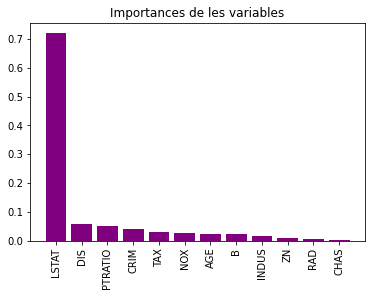

In [539]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Importances de les variables")
plt.bar(range(X_train1.shape[1]), importances[indices],
       color="purple", yerr=std[indices], align="center")
plt.xticks(range(X_train1.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train1.shape[1]])
plt.show()